In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# METHOD ONE - 
# Design a query to retrieve the last 12 months of precipitation data and plot the results


#Calculate the date 1 year ago from the last data point in the database
# last_date is a query result and cannot be used in calculation. use for loop to grab date from last_date.
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
for date in last_date:
    date = date
    print(f"Last data point is {date}")
    
one_year_ago = datetime.strptime(date, '%Y-%m-%d') - dt.timedelta(days=365)
print(f"Date from one year ago is {one_year_ago}")


'''ANOTHER METHOD TO PLUG last_date into function, bypassing limitation of last_date as a 'result':
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
for date in last_date:
    year,month,date = date.strip().split("-",2)
    print(f"Last data point is {year}-{month}-{date}")
    
one_year_ago = dt.date(int(year),int(month),int(date)) - dt.timedelta(days=365)
print(f"Date from one year ago is {one_year_ago}")'''


# Perform a query to retrieve the data and precipitation scores
one_year_date = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > one_year_ago).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
one_year_df = pd.DataFrame(one_year_date)


# Sort the dataframe by date
one_year_df.sort_values(by=['date'])

one_year_df

Last data point is 2017-08-23
Date from one year ago is 2016-08-23 00:00:00


date  prcp
0     2016-08-24  0.08
1     2016-08-25  0.08
2     2016-08-26  0.00
3     2016-08-27  0.00
4     2016-08-28  0.01
...          ...   ...
2218  2017-08-19  0.09
2219  2017-08-20   NaN
2220  2017-08-21  0.56
2221  2017-08-22  0.50
2222  2017-08-23  0.45

[2223 rows x 2 columns]

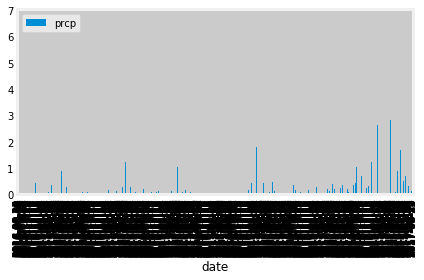

In [11]:
# Use Pandas Plotting with Matplotlib to plot the data
one_year_df.plot(kind = 'bar', x = 'date', y = 'prcp')
plt.tight_layout()
plt.show()
# plt.savefig('precipitation.png')

![precipitation](Images/precipitation.png)

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data

one_year_df.describe()

prcp
count  2015.000000
mean      0.176462
std       0.460288
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000

![describe](Images/describe.png)

In [13]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Station.station).count()
print(f"There are {stations} meteorological stations in this dataset.")

There are 9 meteorological stations in this dataset.


In [41]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

station_activities = session.query(Measurement.station, Station.name, func.count(Measurement.station).label('activities count'))\
                                   .outerjoin(Station, Measurement.station == Station.station)\
                                   .group_by(Measurement.station)\
                                   .order_by(func.count(Measurement.station).label('activities count').desc()).all()


station_activities_df = pd.DataFrame(station_activities)
station_activities_df

station                                    name  activities count
0  USC00519281                     WAIHEE 837.5, HI US              2772
1  USC00519397                    WAIKIKI 717.2, HI US              2724
2  USC00513117                    KANEOHE 838.1, HI US              2709
3  USC00519523      WAIMANALO EXPERIMENTAL FARM, HI US              2669
4  USC00516128            MANOA LYON ARBO 785.2, HI US              2612
5  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US              2202
6  USC00511918       HONOLULU OBSERVATORY 702.2, HI US              1979
7  USC00517948                       PEARL CITY, HI US              1372
8  USC00518838              UPPER WAHIAWA 874.3, HI US               511

In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
